Deskrispsi Fitur : 

1. Sl_No: Kolom yang menunjukkan indeks atau nomor seri yang diberikan untuk setiap entri dalam dataset.

2. Kunci Pelanggan: Setiap pelanggan dalam dataset diidentifikasi secara unik oleh kolom ini.

3. Batas kredit rata-rata yang dialokasikan untuk setiap klien ditampilkan di kolom berlabel "Avg_Credit_Limit." Kolom ini menunjukkan jumlah rata-rata kredit yang diizinkan untuk dipinjam atau digunakan oleh setiap nasabah pada kartu kredit mereka.

4. Total Kartu Kredit: Kolom ini menunjukkan jumlah kartu kredit yang dimiliki oleh setiap nasabah.

5. Total_kunjungan_bank: Kolom ini menunjukkan jumlah total kunjungan nasabah ke cabang bank yang sebenarnya.

6. Total_kunjungan_online: Kolom ini menunjukkan jumlah total berapa kali nasabah mengunjungi situs web atau platform perbankan online.

7. Total_calls_made : kolom ini menunjukkan jumlah total panggilan yang dilakukan oleh setiap pelanggan ke layanan pelanggan atau pusat dukungan perusahaan kartu kredit.


### Evaluasi :

### 1.	Data yang digunakan :
##### Data terdiri dari 660 baris dan 7 kolom fitur untuk pelanggan kartu kredit. Fitur-fiturnya meliputi batas kredit rata-rata, jumlah kartu kredit, ##### kunjungan ke bank, kunjungan online, panggilan, rasio utilisasi kredit, dan skor interaksi.
### 2.	Praproses Data :
##### • Menangani missing values: Tidak ada missing values
##### •	Mengatasi outlier pada kolom Avg_Credit_Limit
##### •	Melakukan normalisasi pada fitur Avg_Credit_Limit dan Credit_Utilization_Ratio
### 3.	Pemilihan Jumlah Kluster
##### Jumlah kluster optimum dipilih berdasarkan Elbow Method, yaitu 3 kluster.
### 4.	Klusterisasi K-Means
##### K-Means dilatih pada data yang telah dinormalisasi dengan 3 kluster. Dari visualisasi, terlihat bahwa kluster yang terbentuk cukup terpisah.
### 5.	Interpretasi Kluster
##### •	Kluster 0: Pelanggan dengan batas kredit dan rasio utilisasi kredit rendah
##### •	Kluster 1: Pelanggan dengan batas kredit sedang dan rasio utilisasi kredit rendah
##### •	Kluster 2: Pelanggan dengan batas kredit tinggi dan rasio utilisasi kredit tinggi
### 6.	Evaluasi
##### Secara keseluruhan, model K-Means telah berhasil membagi pelanggan ke dalam kluster yang berbeda berdasarkan karakteristik kredit mereka. Hasil  kluster sudah cukup baik dilihat dari visualisasi. Namun, performa model sebaiknya dievaluasi lebih lanjut menggunakan metric seperti Silhouette Score.


1. Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')
sns.set_color_codes('colorblind')
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import warnings  #Remove unnecessary warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_score

2. Reading Data

In [2]:
dataset = pd.read_csv('Credit Card Customer Data.csv')

In [3]:
dataset.shape

(660, 7)

In [4]:
dataset.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
dataset

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


3. Analisis Data Penjelasan Statistik

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [7]:
dataset.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [8]:
dataset.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [9]:
dataset.duplicated().any()

False

4. Membangun Fitur Baru

In [10]:
# Buat kolom baru bernama "Credit_Utilization_Ratio" untuk menetapkan rasio penggunaan kredit yang dihitung untuk setiap pelanggan.
dataset['Credit_Utilization_Ratio'] = dataset['Avg_Credit_Limit'] / dataset['Total_Credit_Cards']

In [11]:
# Membuat kolom baru yang disebut "Interaction_Score" dapat membantu mengidentifikasi nasabah yang lebih aktif terlibat dengan layanan bank.
dataset['Interaction_Score'] = dataset['Total_visits_bank'] + dataset['Total_visits_online'] + dataset['Total_calls_made']

In [12]:
dataset.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Credit_Utilization_Ratio,Interaction_Score
0,1,87073,100000,2,1,1,0,50000.000000,2
1,2,38414,50000,3,0,10,9,16666.666667,19
2,3,17341,50000,7,1,3,4,7142.857143,8
3,4,40496,30000,5,1,1,4,6000.000000,6
4,5,47437,100000,6,0,12,3,16666.666667,15


In [13]:
dataset.shape

(660, 9)

5. Visulisasi Data

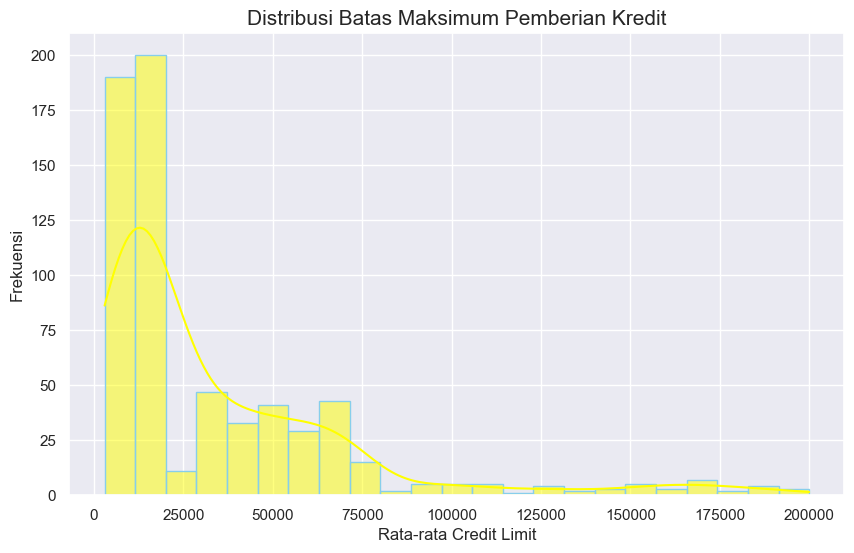

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(data=dataset, x='Avg_Credit_Limit', kde=True, ax=ax, color='yellow', edgecolor='skyblue', linewidth=1)

ax.set_title('Distribusi Batas Maksimum Pemberian Kredit', fontsize=15)
ax.set_xlabel('Rata-rata Credit Limit', fontsize=12)
ax.set_ylabel('Frekuensi', fontsize=12)
ax.grid(True)

plt.show()

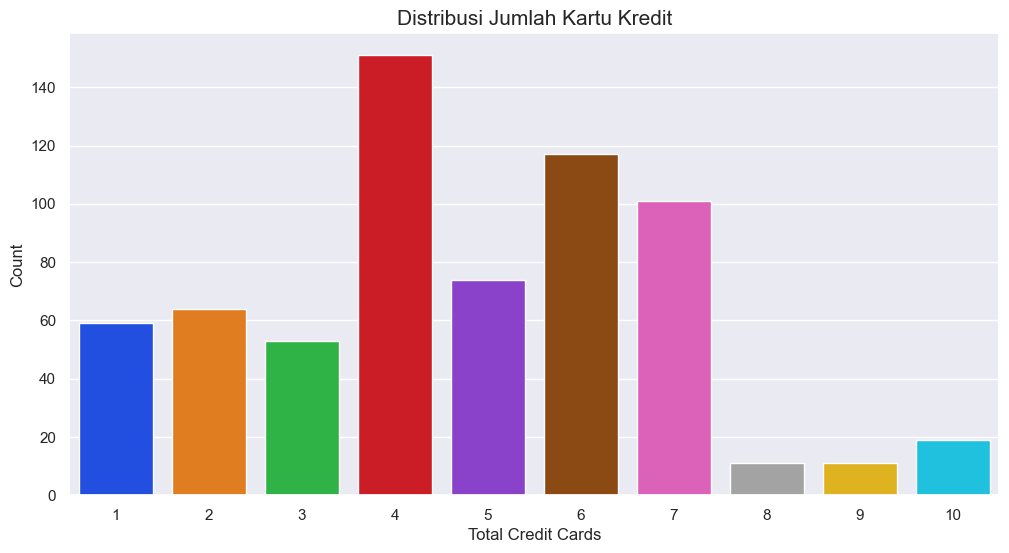

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.countplot(data=dataset, x='Total_Credit_Cards', ax=ax, palette='bright')

ax.set_title('Distribusi Jumlah Kartu Kredit', fontsize=15)
ax.set_xlabel('Total Credit Cards', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

plt.show()

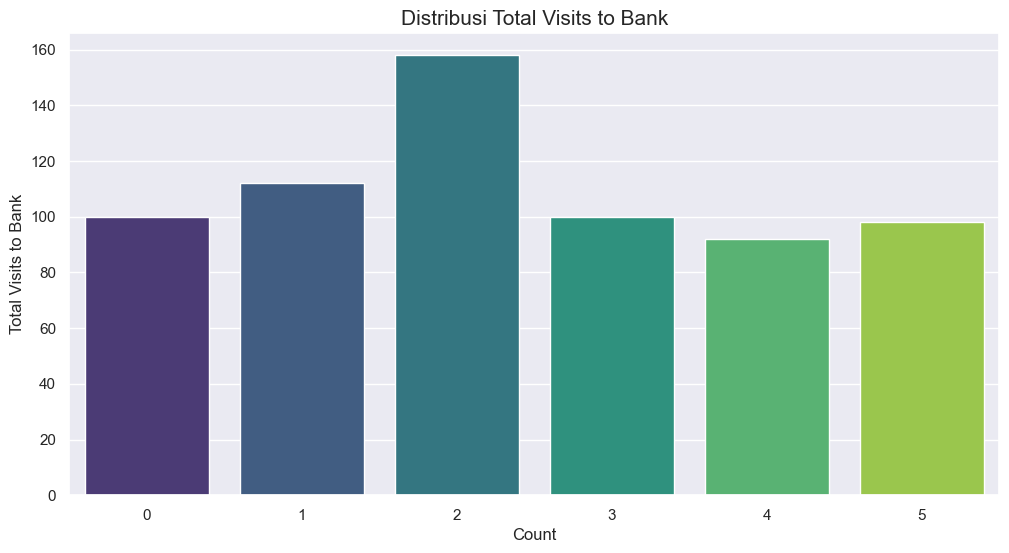

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.countplot(data=dataset, x='Total_visits_bank', ax=ax, palette='viridis')

ax.set_title('Distribusi Total Visits to Bank', fontsize=15)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Total Visits to Bank', fontsize=12)

plt.show()



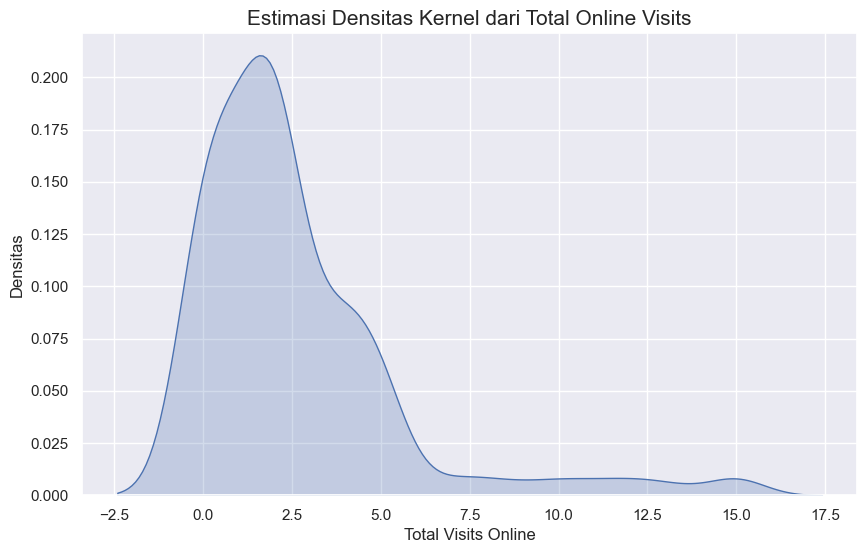

In [17]:


fig, ax = plt.subplots(figsize=(10, 6))

sns.kdeplot(data=dataset, x='Total_visits_online', ax=ax, fill=True)

ax.set_title('Estimasi Densitas Kernel dari Total Online Visits', fontsize=15)
ax.set_xlabel('Total Visits Online', fontsize=12)
ax.set_ylabel('Densitas', fontsize=12)
plt.show()



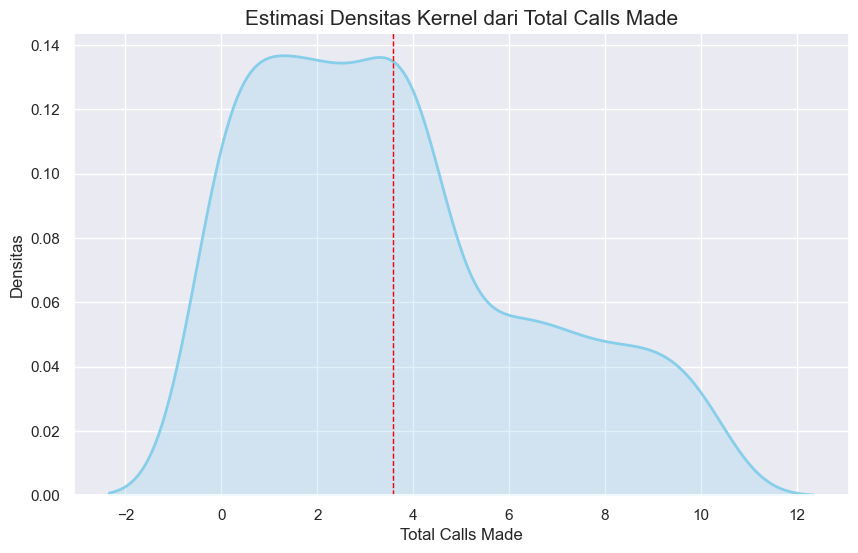

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.kdeplot(data=dataset, x='Total_calls_made', ax=ax, fill=True, color='skyblue', linewidth=2)
plt.axvline(dataset['Total_calls_made'].mean(), color='red', linestyle='dashed', linewidth=1)

ax.set_title('Estimasi Densitas Kernel dari Total Calls Made', fontsize=15)
ax.set_xlabel('Total Calls Made', fontsize=12)
ax.set_ylabel('Densitas', fontsize=12)

plt.show()

6. Fitur yang di perlukan

In [19]:
Corr = dataset.corr()

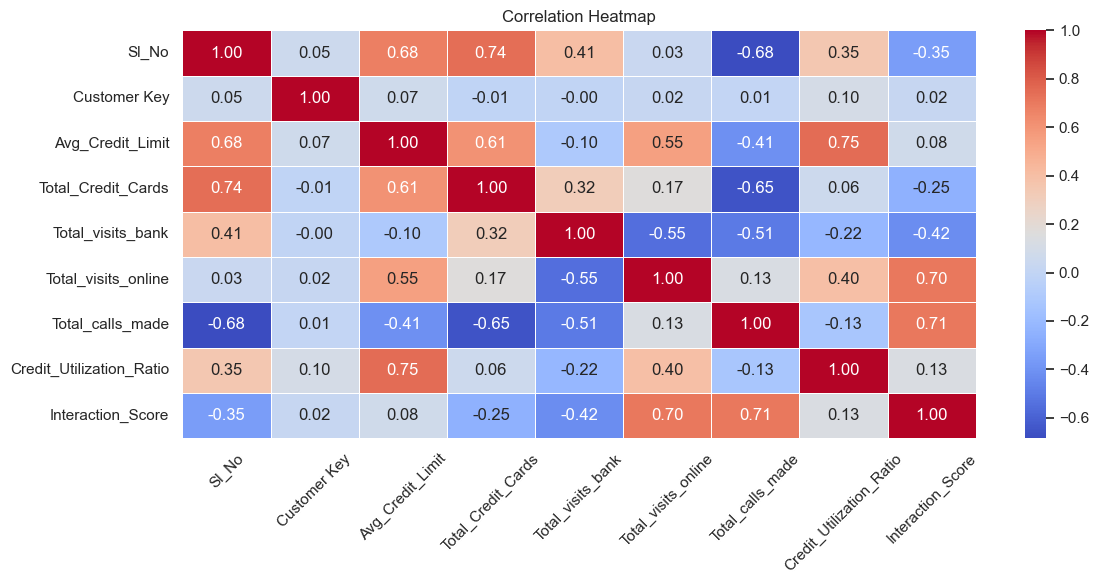

In [20]:
plt.figure(figsize=(12, 6))
sns.heatmap(Corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

7 . Mengecek apakah ada outiler atau tidak

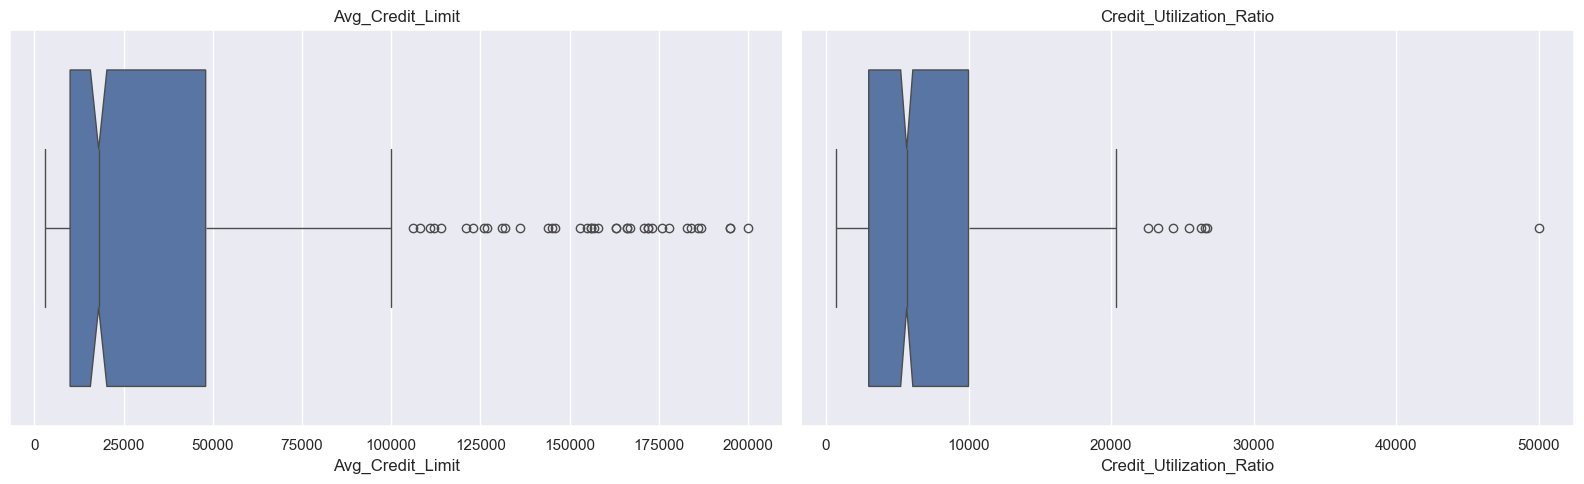

In [21]:
selected_columns = ['Avg_Credit_Limit','Credit_Utilization_Ratio']

notch = True

fig, axes = plt.subplots(nrows=1, ncols=len(selected_columns), figsize=(16, 5))

for i, column in enumerate(selected_columns):
    sns.boxplot(x=dataset[column], ax=axes[i], notch=notch)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

Temuan : Seperti yang ditunjukkan, kolom "Batas Kredit Rata-rata" memiliki jumlah outlier tertinggi. Sekarang kita harus menghilangkan outiler nya


In [22]:
# digunakan untuk menghitung Rentang Interkuartil (Interquartile Range/IQR) dari suatu variabel dalam dataset, di mana variabel tersebut adalah 'Avg_Credit_Limit'.
Q1 = dataset['Avg_Credit_Limit'].quantile(0.25)
Q3 = dataset['Avg_Credit_Limit'].quantile(0.75)
IQR = Q3 - Q1
IQR

38000.0

In [23]:
# menghitung batas bawah (lower limit) dan batas atas (upper limit) sebagai acuan dalam mendeteksi outlier dalam distribusi 'Avg_Credit_Limit'.
lower_limit  = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('lower limit is: ' , lower_limit)
print('Upper limit is: ' , upper_limit)

lower limit is:  -47000.0
Upper limit is:  105000.0


In [24]:
# mengidentifikasi outlier dalam variabel 'Avg_Credit_Limit' berdasarkan batas bawah (lower limit) dan batas atas (upper limit) yang telah dihitung sebelumnya.
outliers = dataset[(dataset['Avg_Credit_Limit'] < lower_limit) | (dataset['Avg_Credit_Limit'] > upper_limit)]

In [25]:
# digunakan untuk menggantikan nilai outlier dalam variabel 'Avg_Credit_Limit' dengan batas bawah (lower limit) atau batas atas (upper limit) yang telah ditentukan.
dataset['Avg_Credit_Limit'] = np.where((dataset['Avg_Credit_Limit'] < lower_limit), lower_limit, dataset['Avg_Credit_Limit'])
dataset['Avg_Credit_Limit'] = np.where((dataset['Avg_Credit_Limit'] > upper_limit), upper_limit, dataset['Avg_Credit_Limit'])

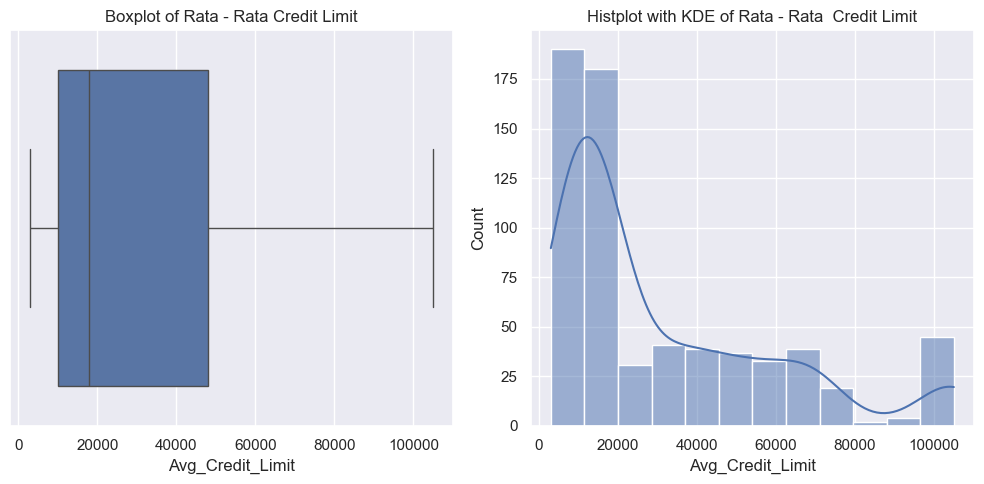

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))



sns.boxplot(x=dataset["Avg_Credit_Limit"], ax=axes[0])
axes[0].set_title("Boxplot of Rata - Rata Credit Limit")

sns.histplot(x=dataset["Avg_Credit_Limit"], ax=axes[1], kde=True)
axes[1].set_title("Histplot with KDE of Rata - Rata  Credit Limit")

plt.tight_layout()
plt.show()

8. Scalling pada data yang sudah di hilangkan outiler agar nanti dapat di terapkan model K-Means

In [27]:
# adalah alat yang berguna untuk mengubah fitur-fitur dalam suatu dataset untuk membuat normalisasi data dan mengatasi masalah skala pada data
scaler = MinMaxScaler()

In [28]:
# di gunakan untuk menyesuaikan kolom avg_credit_limit dan credit_utilization_ration dengan menggunakan scaler fit trasnform
dataset['Avg_Credit_Limit'] = scaler.fit_transform(dataset[['Avg_Credit_Limit']])
dataset['Credit_Utilization_Ratio'] = scaler.fit_transform(dataset[['Credit_Utilization_Ratio']])

In [29]:
# tahap untuk menghitung beberapa statistik agregat (aggregated statistics) dari dua kolom, yaitu 'Avg_Credit_Limit' dan 'Credit_Utilization_Ratio', pada suatu dataset
agg_dataset = dataset.agg({'Avg_Credit_Limit': ['mean', 'min', 'max'], 'Credit_Utilization_Ratio': ['mean', 'min', 'max']})
agg_dataset

,Avg_Credit_Limit,Credit_Utilization_Ratio
mean,0.281046,0.131598
min,0.000000,0.000000
max,1.000000,1.000000


9. Penerapan Model K-Means

In [30]:
X = dataset.iloc[:,[2,7]]
X

,Avg_Credit_Limit,Credit_Utilization_Ratio
0,0.950980,1.000000
1,0.460784,0.323671
2,0.460784,0.130435
3,0.264706,0.107246
4,0.950980,0.323671
...,...,...
655,0.941176,0.186377
656,0.794118,0.155942
657,1.000000,0.353261
658,1.000000,0.334493


In [31]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    print('Cost_Function=',kmeans.inertia_,'with', i, 'Clusters')
    wcss.append(kmeans.inertia_)

Cost_Function= 59.54274865285163 with 1 Clusters
Cost_Function= 16.62356359649408 with 2 Clusters
Cost_Function= 8.93810866058065 with 3 Clusters
Cost_Function= 5.820590878393672 with 4 Clusters
Cost_Function= 4.103177675077764 with 5 Clusters
Cost_Function= 3.328901010425862 with 6 Clusters
Cost_Function= 2.734161730997159 with 7 Clusters
Cost_Function= 2.306130023419285 with 8 Clusters
Cost_Function= 1.969908257651928 with 9 Clusters
Cost_Function= 1.6685227866792627 with 10 Clusters


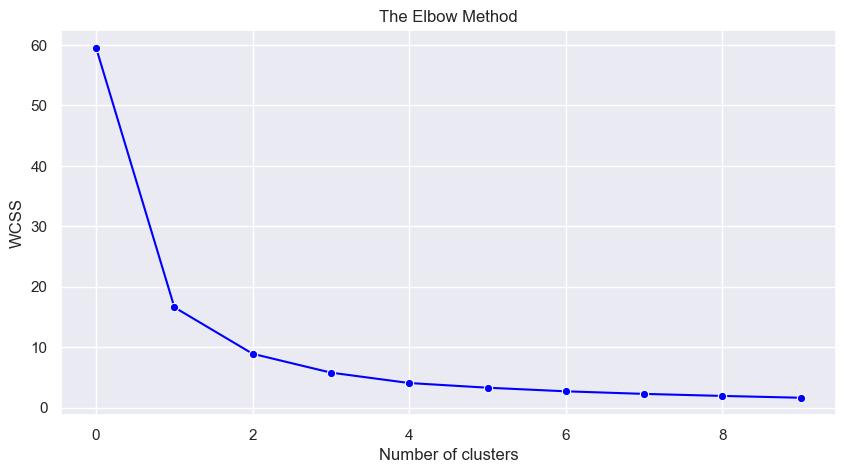

In [32]:
plt.figure(figsize=(10,5))
sns.lineplot(wcss,marker='o',color='blue')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- Temuan : Dari Elbow Plot, jumlah cluster yang optimal adalah 3

In [33]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [34]:
# Get the cluster labels
labels = kmeans.labels_

In [35]:
dataset['Cluster'] = labels
dataset.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Credit_Utilization_Ratio,Interaction_Score,Cluster
0,1,87073,0.950980,2,1,1,0,1.000000,2,2
1,2,38414,0.460784,3,0,10,9,0.323671,19,1
2,3,17341,0.460784,7,1,3,4,0.130435,8,1
3,4,40496,0.264706,5,1,1,4,0.107246,6,0
4,5,47437,0.950980,6,0,12,3,0.323671,15,2


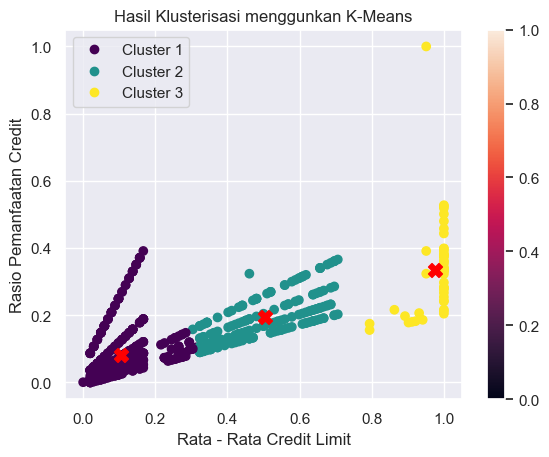

In [36]:
centroids = kmeans.cluster_centers_
scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=100, label='Centroids')

# Create custom legend labels for each cluster
legend_labels = [f'Cluster {i+1}' for i in range(3)]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.xlabel('Rata - Rata Credit Limit')
plt.ylabel('Rasio Pemanfaatan Credit')
plt.title('Hasil Klusterisasi menggunkan K-Means')
plt.colorbar()